全球平均温度变化可视化分析

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir(r'C:\Users\10437\Desktop\data_source')
global_temp=pd.read_csv('GlobalTemperatures.csv',encoding='utf-8')

In [2]:
#陆地平均温度变化

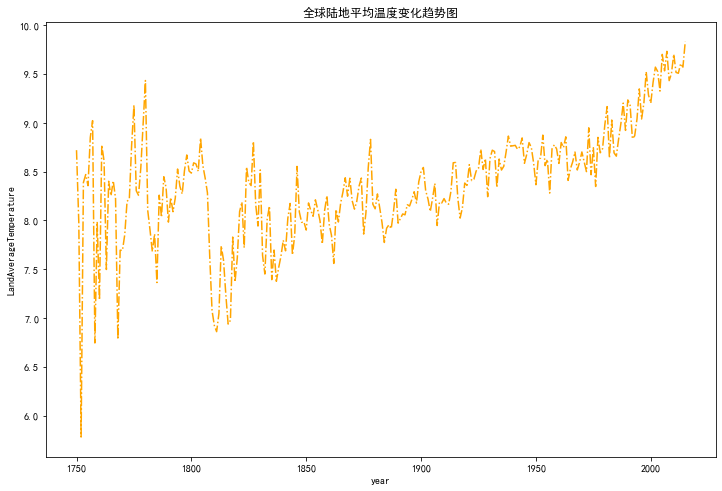

In [3]:
#Matplotlib折线图展示陆地平均温度变化
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
global_temp.dt=pd.to_datetime(global_temp.dt,errors='coerce')
global_temp['year']=global_temp['dt'].dt.year
plt.figure(figsize=(12,8),facecolor='white')
plt.ylabel('LandAverageTemperature')
plt.title('全球陆地平均温度变化趋势图')
global_temp.groupby('year').LandAverageTemperature.apply(np.mean).plot(ls='-.' ,c='orange')
plt.show()

In [18]:
#上图可以看到突变的数值较多，需加入置信值
#plotly折线图展示陆地平均温度变化
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

pyplot=py.offline.plot
years=[global_temp.year]
global_temp.mean_temp=[]
global_temp.mean_temp_uncertainty=[]
for year in years:
 #计算温度均值
 global_temp.mean_temp.append(global_temp[global_temp['year'] == year]['LandAverageTemperature'].mean())
 #计算置信温度均值
 global_temp.mean_temp_uncertainty.append(global_temp[global_temp['year'] == year]['LandAverageTemperatureUncertainty'].mean())

s1 = go.Scatter(
    x = years, 
    y = np.array(global_temp.mean_temp) + np.array(global_temp.mean_temp_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
s2 = go.Scatter(
    x = years, 
    y = np.array(global_temp.mean_temp) - np.array(global_temp.mean_temp_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

s3 = go.Scatter(
    x = years, 
    y = global_temp.mean_temp,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [s1, s2, s3]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
pyplot(fig)

'temp-plot.html'

In [ ]:
#从图中可以明显看出陆地温度近百年来的上升趋势